## 개요

https://data.bls.gov/timeseries/LNS14000000

In [17]:
import pandas as pd

unemp = pd.read_excel('SeriesReport-20210915211830_1978a1.xlsx')
unemp.columns = unemp.iloc[10].values
unemp = unemp.iloc[11:]

c:\users\cpb06gamen\appdata\local\programs\python\python39\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [44]:
unemp['Year'] = pd.to_datetime(unemp.Year, format='%Y').dt.year
unemp = unemp.reset_index(drop=True)
unemp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2011,9.1,9,9,9.1,9,9.1,9,9,9,8.8,8.6,8.5
1,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2,2013,8,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
3,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
4,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5,5,5.1,5
5,2016,4.8,4.9,5,5.1,4.8,4.9,4.8,4.9,5,4.9,4.7,4.7
6,2017,4.7,4.6,4.4,4.5,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
7,2018,4,4.1,4,4,3.8,4,3.8,3.8,3.7,3.8,3.8,3.9
8,2019,4,3.8,3.8,3.7,3.7,3.6,3.6,3.7,3.5,3.6,3.6,3.6
9,2020,3.5,3.5,4.4,14.8,13.3,11.1,10.2,8.4,7.8,6.9,6.7,6.7


In [57]:
## moving average
## 현재 시점까지의 윈도우 평균
mv = unemp.rolling(3).mean()

## exponentially weighted moving average
## 비교적 최근 데이터에 가중치를 많이 주는 기법
emv = unemp.ewm(3).mean()

## forward fill
## 이전 값으로 na 채우기
ffill = mv.copy()
ffill.iloc[0] = ffill.iloc[10]
ffill = mv.fillna(method='ffill')

## spline
## 추세에 따라 움직이는 seq에 사용
spline = mv.copy()
spline.iloc[0] = spline.iloc[10]
spline = spline.interpolate(method='spline', order=5)

## 실습

https://github.com/drnesr/WaterConsumption/blob/master/data/SampleData.csv

In [65]:
import requests

url = 'https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv'
res = requests.get(url).content

with open('Sample_data.csv', 'wb') as f:
    f.write(res)

In [67]:
df = pd.read_csv('Sample_data.csv')
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [68]:
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [77]:
import numpy as np

# df['missing'] = np.nan
# 이 방식은 pandas warning이 뜰 수 있음
df = df.assign(missing=np.nan)
df.missing[df.target.isna()] = df.reference
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
 2   missing    21 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


<AxesSubplot:xlabel='Date'>

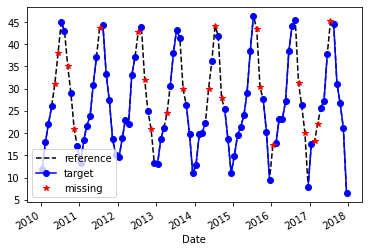

In [79]:
df.plot(style=['k--', 'bo-', 'r*'])

In [84]:
# impute

# 평균
df = df.assign(FillMean=df.target.fillna(df.target.mean()))

# 중앙값
df = df.assign(FillMedian=df.target.fillna(df.target.median()))

# rolling avg.
df = df.assign(RollingMean=df.target.fillna(df.target.rolling(24, min_periods=1).mean()))

# rolling med.
df = df.assign(RollingMedian=df.target.fillna(df.target.rolling(24, min_periods=1).median()))

# Interpolate linear
df = df.assign(InterpolateLinear=df.target.fillna(df.target.interpolate(method='linear')))

# Interpolate time 
df = df.assign(InterpolateTime=df.target.fillna(df.target.interpolate(method='time')))

# Interpolate Quadratic
df = df.assign(InterpolateQudratic=df.target.fillna(df.target.interpolate(method='quadratic')))

# Interpolate Cubic
df = df.assign(InterpolateCubic=df.target.fillna(df.target.interpolate(method='cubic')))

# Interpolate Linear
df = df.assign(InterpolateLinear=df.target.fillna(df.target.interpolate(method='linear')))

# Interpolate Poly
df = df.assign(InterpolatePoly=df.target.fillna(df.target.interpolate(method='polynomial', order=5)))

# Interpolate Spline
df = df.assign(InterpolateSpline=df.target.fillna(df.target.interpolate(method='spline', order=4)))

In [86]:
from sklearn.metrics import r2_score

# list(df) == column name
res = [(method, r2_score(df.reference, df[method])) for method in list(df)[3:]]
res_df = pd.DataFrame(np.array(res), columns=['Method', 'R^2'])
res_df.sort_values(by='R^2', ascending=False)

,Method,R^2
5,InterpolateTime,0.9815664478940275
4,InterpolateLinear,0.9813215759943529
6,InterpolateQudratic,0.9663474396797
7,InterpolateCubic,0.9633218181089737
8,InterpolatePoly,0.954157955951024
9,InterpolateSpline,0.928463604189156
0,FillMean,0.7859894121335577
2,RollingMean,0.7457974578754563
1,FillMedian,0.7347827483233148
3,RollingMedian,0.6888988883243206


<AxesSubplot:xlabel='Date'>

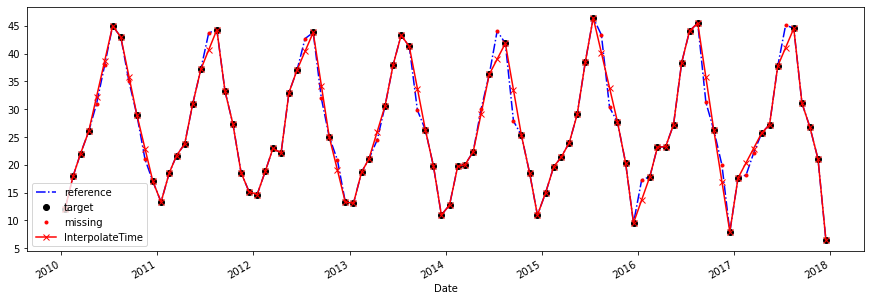

In [90]:
final_df = df[['reference', 'target', 'missing', 'InterpolateTime']]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(15, 5))